In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import sytle
style.use('five thirty eight')
%matplotlib inline
import datetime


ImportError: cannot import name 'sytle' from 'matplotlib' (C:\Users\BUYPCCOMPUTERS\anaconda3\lib\site-packages\matplotlib\__init__.py)

In [30]:
# importing dataset

df1 = pd.read_excel('hotel_2018.Xlsx')
df2 = pd.read_excel('hotel_2019.Xlsx')
df3 = pd.read_excel('hotel_2020.Xlsx')
df4 = pd.read_excel('hotel_meal_cost.Xlsx')
df5 = pd.read_excel('hotel_marketsegment_discount.Xlsx')

In [41]:
# concatinate, since the datatypes are in the correct format and the table columns are thesame
concat= pd.concat([df1, df2, df3])

In [42]:
#left join df5 on concat, since they both have a common column 'market_segment' 
joined1 = pd.merge(concat,df5, on = 'market_segment', how ='left')

In [43]:
#left join df4 on joined1 since they have common column 'meal'
joined2 = pd.merge(joined1,df4, on = 'meal', how ='left')

In [44]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows',40)

In [45]:
joined2.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2018-05-06,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2018-04-22,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2018-06-23,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,2018-05-11,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2018-05-29,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Resort Hotel,1,1,2018,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2018-07-08,0.15,12.99
46,Resort Hotel,1,102,2018,July,28,8,1,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,66.42,0,1,Canceled,2018-05-28,0.10,12.99
47,Resort Hotel,1,280,2018,July,28,8,2,5,2,1.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,112.00,0,1,Canceled,2018-04-15,0.30,17.99
48,Resort Hotel,1,77,2018,July,28,9,0,3,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,250.0,NaN,0,Transient,97.00,0,0,Canceled,2018-06-02,0.10,12.99


In [46]:
joined2.drop('reservation_status_date', axis=0, inplace=True)

KeyError: "['reservation_status_date'] not found in axis"

In [47]:
joined2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Discount', 'Cost'],
      dtype='object')

In [48]:
joined2.shape

(128218, 34)

In [49]:
# checking for right data format
joined2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128218 entries, 0 to 128217
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           128218 non-null  object        
 1   is_canceled                     128218 non-null  int64         
 2   lead_time                       128218 non-null  int64         
 3   arrival_date_year               128218 non-null  int64         
 4   arrival_date_month              128218 non-null  object        
 5   arrival_date_week_number        128218 non-null  int64         
 6   arrival_date_day_of_month       128218 non-null  int64         
 7   stays_in_weekend_nights         128218 non-null  int64         
 8   stays_in_week_nights            128218 non-null  int64         
 9   adults                          128218 non-null  int64         
 10  children                        128210 non-null  float64

In [50]:
joined2.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [51]:
joined2.isnull().count()

hotel                             128218
is_canceled                       128218
lead_time                         128218
arrival_date_year                 128218
arrival_date_month                128218
arrival_date_week_number          128218
arrival_date_day_of_month         128218
stays_in_weekend_nights           128218
stays_in_week_nights              128218
adults                            128218
children                          128218
babies                            128218
meal                              128218
country                           128218
market_segment                    128218
distribution_channel              128218
is_repeated_guest                 128218
previous_cancellations            128218
previous_bookings_not_canceled    128218
reserved_room_type                128218
assigned_room_type                128218
booking_changes                   128218
deposit_type                      128218
agent                             128218
company         

In [52]:
joined2.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              518
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              17062
company         

# data cleaning

In [53]:
#might not be needing this columns though
joined2.drop('agent', axis=1, inplace=True)
joined2.drop('country', axis=1, inplace=True)

# quick_dataset_statistics

In [54]:
#setting rows and columns 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [55]:
joined2.describe().round()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Discount,Cost
count,128218.0,128218.0,128218.0,128218.0,128218.0,128218.0,128218.0,128218.0,128210.0,128218.0,128218.0,128218.0,128218.0,128218.0,7034.0,128218.0,128218.0,128218.0,128218.0,128218.0,128218.0
mean,0.0,107.0,2019.0,28.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,188.0,2.0,101.0,0.0,1.0,0.0,15.0
std,0.0,109.0,1.0,14.0,9.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,131.0,17.0,50.0,0.0,1.0,0.0,6.0
min,0.0,0.0,2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,-6.0,0.0,0.0,0.0,0.0
25%,0.0,19.0,2019.0,17.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,68.0,0.0,0.0,0.0,13.0
50%,0.0,72.0,2019.0,29.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0,0.0,94.0,0.0,0.0,0.0,13.0
75%,1.0,165.0,2020.0,39.0,23.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,0.0,125.0,0.0,1.0,0.0,13.0
max,1.0,737.0,2020.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,1.0,26.0,72.0,21.0,543.0,391.0,5400.0,8.0,5.0,1.0,35.0


In [56]:
#create revenue column by date
joined2['Revenue']= ((joined2['stays_in_week_nights']+joined2 ['stays_in_weekend_nights'])*(joined2['adr']))

In [57]:
joined2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost,Revenue
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06,0.3,12.99,246.0
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22,0.3,17.99,316.5
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23,0.3,12.99,492.0
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11,0.3,12.99,749.0
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29,0.1,12.99,1083.0


# 1. Is our hotel revenue  growing by year ?

In [58]:
#create revenue column by year? = Grouping by arrival_date_year
joined2[['arrival_date_year','Revenue']].groupby(['arrival_date_year'],as_index=True).sum()

,Revenue
arrival_date_year,
2018,6818116.56
2019,21690608.71
2020,17034779.77


# 2. How is our revenue growing by hotel type?

In [59]:
#create revenue column by year_by hotel type? and Grouping by arrival_date_year
joined2[['arrival_date_year','hotel', 'Revenue']].groupby(['arrival_date_year','hotel'], as_index=True,).sum()

Revenue
arrival_date_year hotel                    
2018              City Hotel     3291708.05
                  Resort Hotel   3526408.51
2019              City Hotel    13146173.74
                  Resort Hotel   8544434.97
2020              City Hotel    10198180.78
                  Resort Hotel   6836598.99

# 3. Should we increase our parking lot size?

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

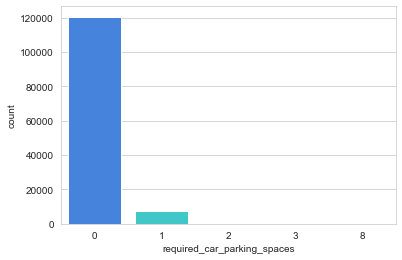

In [60]:

sns.set_style('whitegrid')
sns.countplot(x='required_car_parking_spaces', data=joined2, palette='rainbow')